# Translator: Go from moment representation to ExpFam-representation
This task is about taking a distribution represented by its moment-parameters, translate it into the exponential family representation, and compare the two by plotting them. We will focus on Gaussians and Gamma-distributed variables here, but this exercise an be done for any exp.fam. distribution.

**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
from scipy.special import gammaln

**Helper function**

Take representation of an exp.fam. distribution and a function to plot the moment-pdf

In [2]:
def plot_pdf(x, h, T, eta, A, moment_pdf):
    """
    Put the pieces of an exp.fam.representation together and compare with the moment-representation.

    :param x: The values for which we will evaluate the two functions
                -- a list of x-values for which the pdf's are calculated
    :param h: The log-base measure. This is a *function* that can be evaluated at any x, and for each x return a scalar
    :param T: The sufficient statistics function. This is again a *Æfunction*. Takes a vector as input and
                return a matrix (the vector of sufficient statistics for each value of the x-vector)
    :param eta: Natural parameters. This is a vector, constant in x so not a function.
    :param A: The log partition function. This is defined by the parameterization,
                hence not a function in the implementation.
    :param moment_pdf: A function that generates the pdf using moment parameters (so, a "pointer" to a built-in)
    :return: Nothing.
    """
    log_exp_fam = h(x) + np.matmul(eta, T(x)) - A   # Put together the log-pdf of the exp.fam. distribution
    plt.plot(x, np.exp(log_exp_fam), "b-")  # Plot it
    plt.plot(x, moment_pdf(x), "r--")   # Plot the "gold-standard"
    plt.title('Moment PDF (red) and ExpFam pdf (blue). Hopefully identical')
    plt.show()

## EXAMPLE: GAUSSIAN

**Define the starting-point**, that is, define the moment-parameters, the range for which 98% of the probability mass resides, and the pdf-function

In [3]:
# Moment parameters
sigma = 3.
mu = -1.
# Choose x to cover most of the are where the distribution has probability mass
x = np.linspace(norm.ppf(0.01, loc=mu, scale=sigma),
                norm.ppf(0.99, loc=mu, scale=sigma), 25)

# The comparison: Gauss pdf using the moment parameters
def normal_pdf_function(x):
    return norm.pdf(x, loc=mu, scale=sigma)

### Define the exp.fam. representation

**Log base measure:** For the Gaussian, $h(x) = -.5\log(2\pi)$. It is constant in $x$ for the Gaussian distribution,
but is defined as a function in the implementation anyway, because the log base measure is a function in general.

In [4]:
def log_base_measure_func(x):
    return -.5 * np.log(2*np.pi)

**Sufficient statistics:** For the gaussian,  $T(x) = [x, x^2]$. Note that if 
`x` is a vector/list this function should return an array

In [5]:
def T_func(x):
    # Define storage space
    ans = np.zeros((2, x.shape[0]))
    # Fill in values
    ans[0, :] = x
    ans[1, :] = x * x
    return ans

**Natural parameters:** Defined from the moment parameters, and for the Gaussian it is 
    $[\frac{\mu}{\sigma^2}, -\frac{1}{2\sigma^2}]$.


In [6]:
natural_parameters = np.array([mu/(sigma*sigma), -.5/(sigma*sigma)])

**Log partition function:** Can be defined from moment parameters $(\mu, \sigma)$
or alternatively from natural parameters. Here we use $A=\frac{\mu^2}{2\sigma^2} + \log|\sigma|$.

In [7]:
log_partition = mu*mu/(2*sigma*sigma) + np.log(sigma)

### Plot the exp-fam we generated, and compare to the moment-parameterized PDF
Note how functions are passed on, e.g. `h=log_base_measure_func` will ensure that `h(x)`can be called from `plot_pdf` with the `x` that is defined in the scope fo that function.

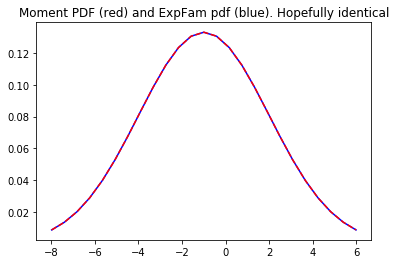

In [8]:
plot_pdf(x=x, h=log_base_measure_func, T=T_func, 
         eta=natural_parameters, A=log_partition, 
         moment_pdf=normal_pdf_function)

## And now the Gamma-distruibution

Start by setting up. We can later play with alpha and beta

In [9]:
# Moment parameters
alpha = 2.
beta = 3.
# Choose x as the range that covers 98% prob.mass
x = np.linspace(gamma.ppf(0.01, a=alpha, scale=1/beta),
                gamma.ppf(0.99, a=alpha, scale=1/beta), 25)

# Calculate moment-parameter pdf
def gamma_pdf_func(x):
    return gamma.pdf(x, a=alpha, scale=1/beta)

### Make the ExpFam representation

Information about the Gamma can be found 
[here](https://en.wikipedia.org/wiki/Exponential_family#Table_of_distributions "here") 
or in the slides.

In [10]:
# Log base measure: $h(x) = 0$. It is constant in x, but is defined as a function anyway
def log_base_measure_func(x):
    return 0

# Sufficient statistics: $T(x) = [\log(x), x]$.
# If x is an array this function should return an array
def T_func(x):
    # Define storage space
    ans = np.zeros((2, x.shape[0]))
    # Fill in values
    ans[0, :] = np.log(x)
    ans[1, :] = x
    return ans

# Natural parameters: Defined from the moment parameters
natural_parameters = np.array([alpha - 1, -beta])

# Log partition function. Can be defined from moment parameters alpha, beta
# or alternatively from natural parameters [eta1, eta2]
log_partition = gammaln(alpha) - alpha * np.log(beta)

**Test by generating a plot**

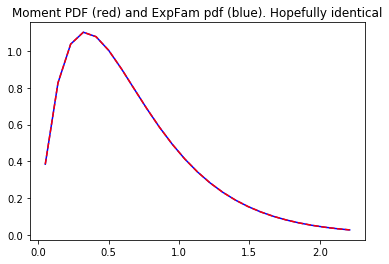

In [11]:
plot_pdf(x=x, h=log_base_measure_func, T=T_func, 
         eta=natural_parameters, A=log_partition, moment_pdf=gamma_pdf_func)